In [106]:
import random
import numpy as np
import scipy.stats as stat
import matplotlib.pyplot as plt

In [130]:
#Box-Muller Normal Sampling
#Step 0: Initiate Variables
mean_in = 0
std_in = 1
iterations_in = 1000
hist_bins = 20
p_test_iterations = 1000

rng = np.random.default_rng()

In [112]:
def sample_box_muller(mean, std, iterations):
    samples = []
    
    for i in range(iterations):
        #Step 1: Sample Uniform. We will sample it twice due to the nature of the algorithm.
        u1, u2 = np.random.uniform(0.0, 1.0), np.random.uniform(0.0, 1.0)
        
        #Step 2: Transform to Normal
        sqrt_term = std*np.sqrt(-2*np.log(u1)) 
        #the above term is included to clarify that calculating this first and reusing it is optimal
        #although Python likely does this automatically
        r1 = mean + (sqrt_term * np.cos(2*np.pi*u2))
        r2 = mean + (sqrt_term * np.sin(2*np.pi*u2))
        
        #Step 3: Update samples
        samples.append(r1)
        samples.append(r2)
    
    return samples

In [113]:
#Sample
samples_out = sample_box_muller(mean_in, std_in, iterations_in)

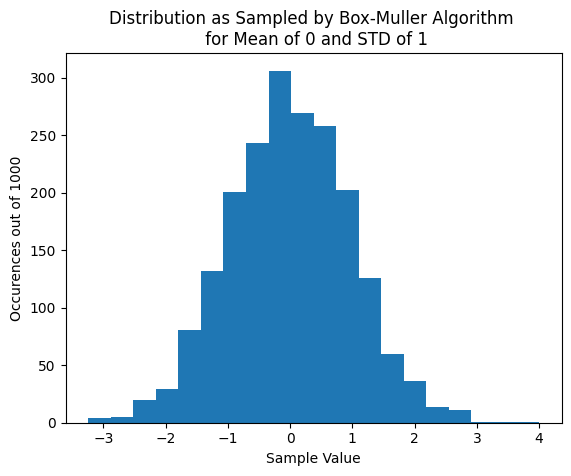

In [114]:
#Create histogram using matplotlib
fig, axs = plt.subplots()
plt.title("Distribution as Sampled by Box-Muller Algorithm \n for Mean of " + str(mean_in) + " and STD of " + str(variance_in))
plt.ylabel("Occurrences out of " + str(iterations_in))
plt.xlabel("Sample Value")

plot = axs.hist(samples_out, bins=hist_bins)
plot = plt.plot()

In [127]:
#Now we can try a bunch of tests of normality and see what the p-values tell us.
p_value_lst = []
for k in range(p_test_iterations):
    k2, p = stat.normaltest(sample_box_muller(mean_in, std_in, iterations_in))
    p_value_lst.append(p)

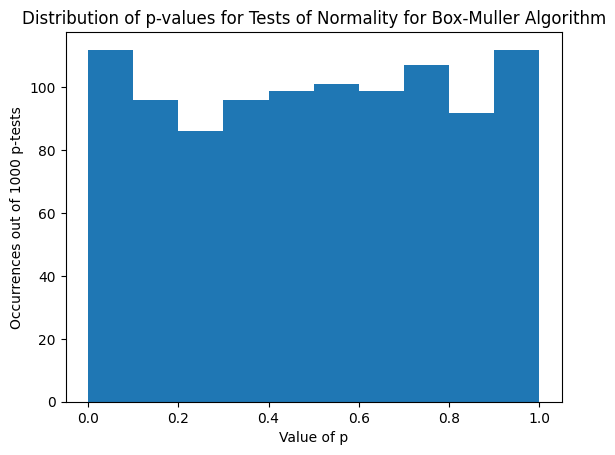

In [132]:
plt.title("Distribution of p-values for Tests of Normality for Box-Muller Algorithm")
plt.ylabel("Occurrences out of " + str(p_test_iterations) + " p-tests")
plt.xlabel("Value of p")

plot = plt.hist(p_value_lst)


In [ ]:
#We can conclude from the uniformly distibuted p values that our algorithm
#is equivalent to sampling from the normal distribution.